# Analiza podatkov - Cene stanovanj v Sloveniji



## Projektna naloga pri predmetu Programiranje 1

Naloga obsega analizo podatkov o nepremičninah, ki so naprodaj v Sloveniji, pridobljenih iz spletne strani www.nepremicnine.net/ v mesecu novembru 2021 ter januarju 2022.

Za posamezne regije oz. območja, kot so navedena na spletni strani sem zajela naslednje podatke: 
- lokacija
- število sob
- nadstropje
- leto izgradnje
- velikost
- cena


In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [103]:
path_november = "C:/Users/Milka/Cene-stanovanj-v-Sloveniji/csv_podatki_november/"

path_januar = "C:/Users/Milka/Cene-stanovanj-v-Sloveniji/csv_podatki_januar/"

import os 
seznam_november = os.listdir(path_november)
seznam_januar = os.listdir(path_januar)

def tabele_v_seznam(seznam, path):
    seznam_tabel = []
    for i in range(len(seznam)):
        tabela = pd.read_csv(path + seznam[i])
        seznam_tabel.append(tabela)
    return seznam_tabel

Za lažje delo bom najprej vse podatke za posamezni mesec združila v novo tabelo. Vsakemu stanovanju bo dodan nov stolpec z informacijo o regiji.

In [104]:
tabele_november = tabele_v_seznam(seznam_november, path_november)
tabele_januar = tabele_v_seznam(seznam_januar, path_januar)

stolpec_regij = ["Dolenjska", "Gorenjska", "Južna Primorska", 
"Koroška", "LJ center", "LJ okolica", "Posavska", 
"Savinjska", "Severna Primorska", "Zasavska"]

podatki_november = pd.concat(tabele_november, keys=stolpec_regij)
podatki_januar = pd.concat(tabele_januar, keys=stolpec_regij)
podatki_november

lokacija      sobno nadstropje  leto velikost  \
Dolenjska 0             MIRNA    3-sobno          1  2021   83,40    
          1        NOVO MESTO    3-sobno          2  2023   90,68    
          2        NOVO MESTO    4-sobno          5  2023  104,82    
          3          ČRNOMELJ    2-sobno          4  1984   62,00    
          4  ČRNOMELJ, CENTER    4-sobno          2  2014  150,00    
...                       ...        ...        ...   ...      ...   
Zasavska  5             KRŠKO  3,5-sobno          M  1992   88,70    
          6            SENOVO    3-sobno          1  1923   98,90    
          7            SENOVO  3,5-sobno         VP  1973  100,00    
          8            SENOVO  3,5-sobno          1  1973  100,00    
          9   SEVNICA, VRHOVO    3-sobno          M  1990   73,00    

                   cena opis  
Dolenjska 0  165.132,00  NaN  
          1  207.332,50  NaN  
          2  273.402,54  NaN  
          3   50.000,00  NaN  
          4   90.000,00  NaN  
...                 ...  ...  
Zasavska  5   59.900,00  NaN  
          6   80.000,00  NaN  
          7   95.000,00  NaN  
          8   89.000,00  NaN  
          9   71.000,00  NaN  

[13915 rows x 7 columns]

### Čiščenje podatkov
V eni izemd tabel se je pojavil dodaten stolpec opis, ki ni koristen, zato ga izbrišem. 
Opazila sem, da se v csv datoteki ponavljajo vnosi, čeprav na spletni strani ni ponovljenih oglasov.
Pri združevanju tabel in brisanju vrstic so se pojavile težave pri indeksih.

In [110]:
pd.set_option("display.max_rows", 10, "display.max_columns", 20)

november = podatki_november.drop_duplicates().drop(columns= 'opis')
januar = podatki_januar.drop_duplicates()

november = november.reset_index().drop('level_1', 1)
januar = januar.reset_index().drop('level_1', 1)

november['regija'] = november['level_0']
januar['regija'] = januar['level_0']

november = november.drop('level_0', 1)
januar = januar.drop('level_0', 1)

#V tabeli januar se je na enem mestu 64 pojavila napačna vrednost, zato jo ročno popravim

januar['cena'][364] = '199.000,00'

C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2519313811.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  november = november.reset_index().drop('level_1', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2519313811.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  januar = januar.reset_index().drop('level_1', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2519313811.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  november = november.drop('level_0', 1)
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2519313811.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  januar = januar.drop('level_0', 1)
C:\Users\Milka\AppData\Loc

Pri pridobivanju podatkov se je pojavilo nekaj napak pri stolpcu 'cena'. Podatke prečistim z naslednjo funckijo in jim spremeni tip v cela števila.
V float bo potrebno spremeniti tudi velikost stanovanja, v int pa leto gradnje.

In [117]:
def popravi_ceno(vnos):
    nov_niz = ''
    for znak in str(vnos):
        if znak != ',':
            nov_niz += znak
        else:
            break
    return int(nov_niz.replace('.',''))

def popravi_velikost(vnos):
    return float((str(vnos)).replace(',', '.'))

def popravi_leto(vnos):
    return int(vnos)

november['cena'] = november['cena'].map(lambda x: popravi_ceno(x))
januar['cena'] = januar['cena'].map(lambda x: popravi_ceno(x))

november['velikost'] = november['velikost'].map(lambda x: popravi_velikost(x))
januar['velikost'] = januar['velikost'].map(lambda x: popravi_velikost(x))

november['leto'] = november['leto'].map(lambda x: popravi_leto(x))
januar['leto'] = januar['leto'].map(lambda x: popravi_leto(x))

# če bi analizo delala za več mesecev bi se splačalo napisati funkcije za vse vrstice, ki se ponavljajo
# primer:

def popravi_ceno_za_mesec(mesec):
    mesec['cena'] = mesec['cena'].map(lambda x: popravi_ceno(x))
    return mesec

popravi_ceno_za_mesec(november)



,lokacija,sobno,nadstropje,leto,velikost,cena,regija
0,MIRNA,3-sobno,1,2021,83.40,165132,Dolenjska
1,NOVO MESTO,3-sobno,2,2023,90.68,207332,Dolenjska
2,NOVO MESTO,4-sobno,5,2023,104.82,273402,Dolenjska
3,ČRNOMELJ,2-sobno,4,1984,62.00,50000,Dolenjska
4,"ČRNOMELJ, CENTER",4-sobno,2,2014,150.00,90000,Dolenjska
...,...,...,...,...,...,...,...
1324,KRŠKO,"3,5-sobno",M,1992,88.70,59900,Zasavska
1325,SENOVO,3-sobno,1,1923,98.90,80000,Zasavska
1326,SENOVO,"3,5-sobno",VP,1973,100.00,95000,Zasavska
1327,SENOVO,"3,5-sobno",1,1973,100.00,89000,Zasavska


Za primerjavo cen bo koristna informacija o ceni na kvadratni meter nepremičnine.

In [118]:
november['cena na m2'] = round(november['cena'] / november['velikost'])
januar['cena na m2'] = round(januar['cena'] / januar['velikost'])
november

,lokacija,sobno,nadstropje,leto,velikost,cena,regija,cena na m2
0,MIRNA,3-sobno,1,2021,83.40,165132,Dolenjska,1980.0
1,NOVO MESTO,3-sobno,2,2023,90.68,207332,Dolenjska,2286.0
2,NOVO MESTO,4-sobno,5,2023,104.82,273402,Dolenjska,2608.0
3,ČRNOMELJ,2-sobno,4,1984,62.00,50000,Dolenjska,806.0
4,"ČRNOMELJ, CENTER",4-sobno,2,2014,150.00,90000,Dolenjska,600.0
...,...,...,...,...,...,...,...,...
1324,KRŠKO,"3,5-sobno",M,1992,88.70,59900,Zasavska,675.0
1325,SENOVO,3-sobno,1,1923,98.90,80000,Zasavska,809.0
1326,SENOVO,"3,5-sobno",VP,1973,100.00,95000,Zasavska,950.0
1327,SENOVO,"3,5-sobno",1,1973,100.00,89000,Zasavska,890.0


Za natančnejšo analizo podatkov glede na mesto v katerem je nepremičnina, moram popraviti stolpec lokacija, tako da bo v njem ostalo samo ime kraja/mesta.

In [119]:
def popravi_mesto(vnos):
    nov_niz = ''
    for znak in str(vnos):
        if znak != ',':
            nov_niz += znak
        else:
            break
    return nov_niz

november['mesto'] = november['lokacija'].map(lambda x: popravi_mesto(x))
januar['mesto'] = januar['lokacija'].map(lambda x: popravi_mesto(x))
november

,lokacija,sobno,nadstropje,leto,velikost,cena,regija,cena na m2,mesto
0,MIRNA,3-sobno,1,2021,83.40,165132,Dolenjska,1980.0,MIRNA
1,NOVO MESTO,3-sobno,2,2023,90.68,207332,Dolenjska,2286.0,NOVO MESTO
2,NOVO MESTO,4-sobno,5,2023,104.82,273402,Dolenjska,2608.0,NOVO MESTO
3,ČRNOMELJ,2-sobno,4,1984,62.00,50000,Dolenjska,806.0,ČRNOMELJ
4,"ČRNOMELJ, CENTER",4-sobno,2,2014,150.00,90000,Dolenjska,600.0,ČRNOMELJ
...,...,...,...,...,...,...,...,...,...
1324,KRŠKO,"3,5-sobno",M,1992,88.70,59900,Zasavska,675.0,KRŠKO
1325,SENOVO,3-sobno,1,1923,98.90,80000,Zasavska,809.0,SENOVO
1326,SENOVO,"3,5-sobno",VP,1973,100.00,95000,Zasavska,950.0,SENOVO
1327,SENOVO,"3,5-sobno",1,1973,100.00,89000,Zasavska,890.0,SENOVO


Zdaj so podatki v grobem pripravljeni za analizo.
Najprej si poglejmo, koliko stanovanj je bilo na voljo po regijah in natančneje po mestih v januarju in novembru.

## Število nepremičnin na trgu glede na regije

Koliko stanovanj je na voljo v posameznih regijah in razlika med meseci?

In [121]:
stevilo_stanovanj_januar_regije = januar[['regija', 'mesto']].copy().groupby(by='regija').size().to_frame()
stevilo_stanovanj_januar_regije.index.names = [None]
stevilo_stanovanj_januar_regije = stevilo_stanovanj_januar_regije.rename(columns={0: 'januar'})

stevilo_stanovanj_november_regije = november[['regija', 'mesto']].copy().groupby(by='regija').size().to_frame()
stevilo_stanovanj_november_regije.index.names = [None]
stevilo_stanovanj_november_regije = stevilo_stanovanj_november_regije.rename(columns={0: 'november'})

df = pd.concat([stevilo_stanovanj_november_regije, stevilo_stanovanj_januar_regije], axis=1)
df


,november,januar
Dolenjska,50,43
Gorenjska,109,120
Južna Primorska,153,154
Koroška,27,29
LJ center,620,576
LJ okolica,113,127
Posavska,22,20
Savinjska,202,164
Severna Primorska,23,24
Zasavska,10,13


<AxesSubplot:>

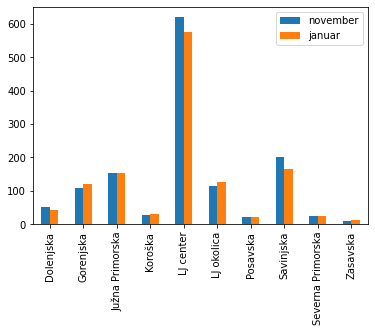

In [122]:
df.plot.bar()

Največ nepremičnin je na voljo v Ljubljani, natančneje v centru. Sledita Savinjska ter Severna Primorska. Najmanj nepremičnin je v Zasavski, Savinjski ter Koroški regiji. 
Sklep velja za oba meseca.

## Število nepremičnin po mestih

In [123]:
stevilo_po_mestih = januar.groupby('mesto').size().sort_values(ascending=False).to_frame()
stevilo_po_mestih.index.names = [None]
stevilo_po_mestih.rename(columns={0: 'število nepremičnin'})

,število nepremičnin
LJ. CENTER,150
LJ. BEŽIGRAD,77
LJ. ŠIŠKA,53
KRANJ,48
KOPER,40
...,...
NOTRANJE GORICE,1
MORAVSKE TOPLICE,1
MLAKA PRI KOČEVJU,1
MISLINJSKA DOBRAVA,1


<AxesSubplot:>

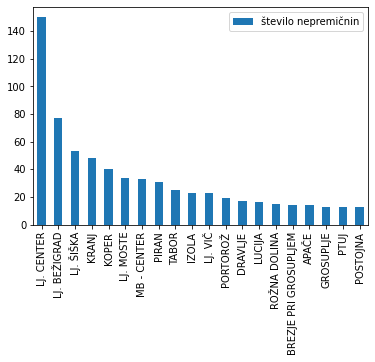

In [124]:
stevilo_po_mestih.rename(columns={0: 'število nepremičnin'}).head(20).plot.bar()

Kot predvideno je največ nepremičnin na voljo v Ljubljani, natančneje v centru, na Bežigradu ter Šiški. Od drugih krajev sledijo Kranj, Koper in Piran. 

## Število nepremičnin glede na leto gradnje

Kako stare so nepremičnine, ki so na trgu?

In [125]:
leto_gradnje_januar = januar[januar.leto > 1800].groupby(by='leto').size().to_frame()
leto_gradnje_januar.index.names = [None]
leto_gradnje_januar = leto_gradnje_januar.rename(columns={0: 'januar'})
leto_gradnje_november = november[november.leto > 1800].groupby(by='leto').size().to_frame()
leto_gradnje_november.names = [None]
leto_gradnje_november = leto_gradnje_november.rename(columns={0: 'november'})

leto_število = pd.concat([leto_gradnje_november, leto_gradnje_januar], axis=1)
leto_število.sort_index(ascending=True)
leto_število

C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\3879286939.py:5: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  leto_gradnje_november.names = [None]


,november,januar
1826,2.0,1.0
1830,2.0,2.0
1833,NaN,2.0
1840,1.0,3.0
1843,1.0,2.0
...,...,...
2019,12.0,16.0
2020,50.0,30.0
2021,114.0,110.0
2022,40.0,55.0


<AxesSubplot:>

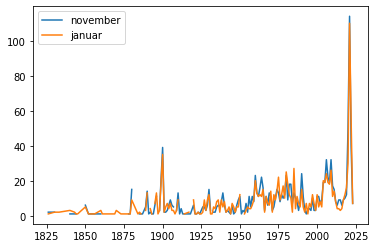

In [126]:
leto_število.plot()

## Število nepremičnin glede na velikost

Katerih nepremičnin (glede na velikost) je na trgu največ?

C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\595577574.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  površina_november.names = [None]


<AxesSubplot:>

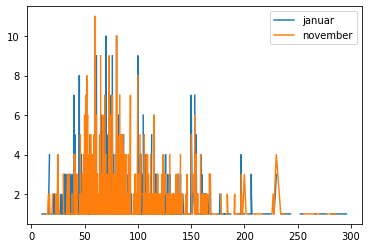

In [127]:
površina_januar = januar[januar.velikost < 300].groupby(by='velikost').size().to_frame()
površina_januar.index.names = [None]
površina_januar = površina_januar.rename(columns={0: 'januar'})

površina_november = november[november.velikost < 300].groupby(by='velikost').size().to_frame()
površina_november.names = [None]
površina_november = površina_november.rename(columns={0: 'november'})

leto_število = pd.concat([površina_januar, površina_november], axis=1)
leto_število.sort_index(ascending=True)
leto_število.plot()

## Povprečna cena kvadratnega metra glede na regijo

Za vsako izmed regij izračunam povprečno ceno na kvadrat.

In [128]:
cena_regije_januar = januar[['regija','cena na m2']].groupby('regija').mean().round()
cena_regije_januar.index.names = [None]
cena_regije_januar = cena_regije_januar.rename(columns={'cena na m2': 'januar'})

cena_regije_november = november[['regija','cena na m2']].groupby('regija').mean().round()
cena_regije_november.index.names = [None]
cena_regije_november = cena_regije_november.rename(columns={'cena na m2': 'november'})

df_regije_cena = pd.concat([cena_regije_november, cena_regije_januar], axis=1)
df_regije_cena


,november,januar
Dolenjska,1470.0,1522.0
Gorenjska,2748.0,2941.0
Južna Primorska,3603.0,3768.0
Koroška,1371.0,1579.0
LJ center,3725.0,3859.0
LJ okolica,2518.0,2588.0
Posavska,1151.0,1750.0
Savinjska,1600.0,1746.0
Severna Primorska,1452.0,1437.0
Zasavska,1167.0,1261.0


<AxesSubplot:>

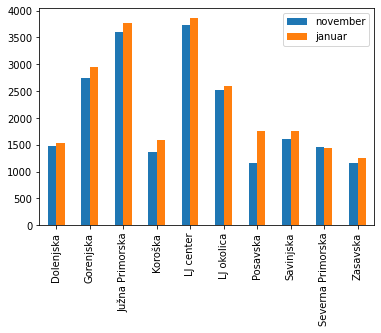

In [129]:
df_regije_cena.plot.bar()

Cene nepremičnin so se povečale v vseh regijah, razen v Severni Primorski regiji.

## Povprečna cena kavdratnega metra glede na mesto

In [130]:
cena_regije_januar = januar[['mesto','cena na m2']].groupby('mesto').mean().round()
cena_regije_januar.index.names = [None]
cena_regije_januar = cena_regije_januar.rename(columns={'cena na m2': 'januar'})
cena_regije_januar

cena_regije_november = november[['mesto','cena na m2']].groupby('mesto').mean().round()
cena_regije_november.index.names = [None]
cena_regije_november = cena_regije_november.rename(columns={'cena na m2': 'november'})

df_regije_cena = pd.concat([cena_regije_november, cena_regije_januar], axis=1)
df_regije_cena.sort_values(by='januar', ascending=False)

,november,januar
KOLEZIJA,5851.0,5851.0
KRANJSKA GORA,5505.0,5458.0
RADOHOVA VAS,NaN,5139.0
BROD,4379.0,4936.0
PORTOROŽ,4637.0,4586.0
...,...,...
ČRNOMELJ,717.0,NaN
ŠENTJAKOB,2558.0,NaN
ŠENTVID PRI STIČNI,1875.0,NaN
ŠENČUR,3490.0,NaN


## Cena nepremičnine v odvisnosti od leta gradnje

Ali so novejše nepremičnine dražje od starejših?

<AxesSubplot:xlabel='leto', ylabel='cena na m2'>

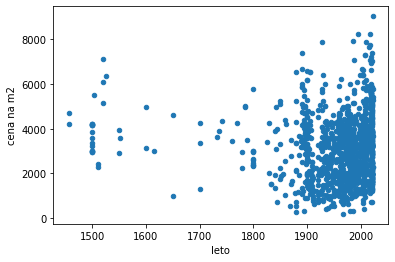

In [131]:
januar[januar.leto > 1400].plot.scatter('leto','cena na m2')

<AxesSubplot:xlabel='leto', ylabel='cena na m2'>

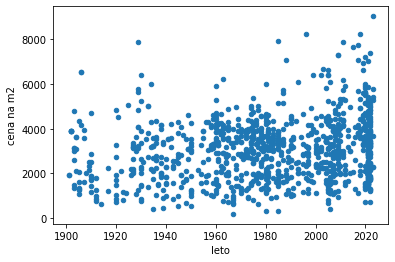

In [132]:
januar[januar.leto > 1900].plot.scatter('leto','cena na m2')

V podatkih ni razvidnega vzorca med ceno stanovanja ter letom gradnje.

## Cena nepremičnin v odvisnosti od njihove velikosti

<AxesSubplot:xlabel='velikost', ylabel='cena'>

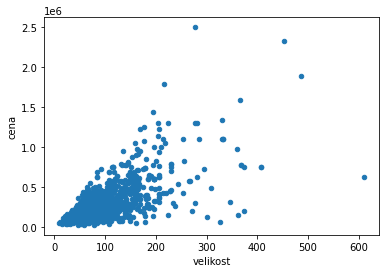

In [133]:
januar.plot.scatter('velikost','cena')

Cena se pričakovano sorazmerno zvišuje s velikostjo.

## Število nepremičnin glede na št. sob

In [134]:
po_velikosti = ['Soba', 'Garsonjera', '1-sobno', '1,5-sobno', '2-sobno', '2,5-sobno', '3-sobno', '3,5-sobno', '4-sobno', '5 in večsobno', 'Drugo']
sobe_januar = januar[['sobno']]
sobe_januar['sobno'] = pd.Categorical(sobe_januar['sobno'],  categories= po_velikosti)
sobe_januar = sobe_januar.groupby(by='sobno').size().to_frame()
sobe_januar.index.names = [None]
sobe_januar = sobe_januar.rename(columns={0: 'januar'})

sobe_november = november[['sobno']]
sobe_november['sobno'] = pd.Categorical(sobe_november['sobno'],  categories= po_velikosti)
sobe_november = sobe_november.groupby(by='sobno').size().to_frame()
sobe_november.index.names = [None]
sobe_november = sobe_november.rename(columns={0: 'november'})

sobe = pd.concat([sobe_november, sobe_januar], axis=1)
sobe


C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\831590534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobe_januar['sobno'] = pd.Categorical(sobe_januar['sobno'],  categories= po_velikosti)
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\831590534.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sobe_november['sobno'] = pd.Categorical(sobe_november['sobno'],  categories= po_velikosti)


,november,januar
Soba,1,3
Garsonjera,38,34
1-sobno,50,65
"1,5-sobno",36,37
2-sobno,251,255
...,...,...
3-sobno,392,358
"3,5-sobno",60,50
4-sobno,298,263
5 in večsobno,82,88


<AxesSubplot:>

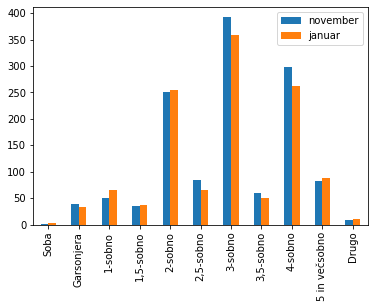

In [135]:
sobe.plot.bar()

Največ nepremičnin na trgu je 2-, 3-, in 4-sobnih.

## Povezava med starostjo stanovanj ter regijami

V katerih regijah so nepremičnine najstarejše? Kje je največ novogradnje?

Izračunam povprečno starost nepremičnin za posamezno regijo.

In [136]:
povprecna_starost = januar[['regija','leto']]
povprecna_starost.groupby('regija').mean().round()

,leto
regija,
Dolenjska,1974.0
Gorenjska,1962.0
Južna Primorska,1956.0
Koroška,2002.0
LJ center,1941.0
LJ okolica,1987.0
Posavska,1980.0
Savinjska,1965.0
Severna Primorska,2001.0


## Analiza nepremičnin, ki so na trgu dlje časa

Za podatke iz novembra in januarja poiščem ponavljajoče se oglase in jih shranim v novo tabelo. V čem nepremičnine, ki so na trgu dlje časa (vsaj 3 mesece), odstopajo od drugih?

In [137]:
skupno = pd.concat([november, januar])
skupno['ponovljeno'] = skupno.duplicated(subset=['lokacija', 'sobno','nadstropje', 'leto', 'velikost', 'regija', 'mesto'])

povprecje_ponovitve = skupno[skupno.ponovljeno == True].drop_duplicates().drop(columns='ponovljeno').mean().round().to_frame().rename(columns={0: 'ponovitve povprečje'})
povprecje_januar = januar.mean().round().to_frame().rename(columns={0: 'januar povprečje'})
povprecje_november = november.mean().round().to_frame().rename(columns={0: 'november povprečje'})
df_regije_cena = pd.concat([povprecje_november, povprecje_januar, povprecje_ponovitve], axis=1)
df_regije_cena

C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2405918827.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  povprecje_ponovitve = skupno[skupno.ponovljeno == True].drop_duplicates().drop(columns='ponovljeno').mean().round().to_frame().rename(columns={0: 'ponovitve povprečje'})
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2405918827.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  povprecje_januar = januar.mean().round().to_frame().rename(columns={0: 'januar povprečje'})
C:\Users\Milka\AppData\Local\Temp\ipykernel_2864\2405918827.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated

,november povprečje,januar povprečje,ponovitve povprečje
leto,1961.0,1957.0,1947.0
velikost,99.0,99.0,112.0
cena,286965.0,298718.0,342206.0
cena na m2,2971.0,3125.0,3107.0


Nepremičnine, ki se prodajajo dlje časa so v povprečju starejša, večja ter dražja od tistih, ki so se prodale v manj kot 3-h mesecih. Vendar pa cena na kvadratni meter teh ne odstopa.

## Zaključek:

Ugotovila sem:
- Nepremičnin je največ v Ljubljani in najmanj v Zasavski, Posavski, Koroški ter Severno Primorski regiji. To drži tako za mesec november kot januar.
- Stanovanja so najdražja v Ljubljani - center, sledita Južna Primorska ter Gorenjska. 
- Najpogosteje se prodajajo nepremičnine velikosti 50-100 kvadratnih metrov.
- Primerjava med meseci in po regijah je pokazala, da so se nepremičnine podražile v vseh regijah, razen v eni.
- Očitno so večja stanovanja tudi dražja, medtem ko jasne povezave med letom gradnje in ceno ni bilo. To gre najbrž pripisati dejstvu, da so zajeti podatki obsegali le leto gradnje, ne pa tudi leto obnove, torej leto gradnje ne odraža ohranjenosti nepremičnine.
- Če se dražja stanovanja (v smislu cene na kvadratni meter) prodajajo dlje nisem mogla sklepati. Stanovanja, ki se prodajajo dlje časa so v povprečju starejša in večja, ter zato posledično dražja (v smislu cele nepremičnine).

Ker zajet opis nepremičnin ni bil koristen, zato sem to analizo ključnih lastnosti opustila.

Žal sem podatke zajela le za dva meseca, zanimiva bi bila podobna analiza za vse mesece v letu, morda tudi primerjava z drugimi državami. V tem primeru bi ponavljajoče se vrstice bilo dobro zapisati v funkcije.